In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import json
from nf2.evaluation.compare import metric, plot_overview
from nf2.evaluation.unpack import load_cube
from nf2.data.isee import load_nc_only_b

class evaluator:
    def __init__(self, config_path):
        with open(config_path) as config:
            info = json.load(config)

        extrapolated_field = os.path.join(info['base_path'], 'extrapolation_result.nf2')
        b = load_cube(extrapolated_field, progress=True)

        reference_field = info['data']['data_path']
        B = load_nc_only_b(reference_field)

        result = metric(b, B)
        print(result)

        self.plot_slice(b, B, z=0, b_norm=2500)

        self.b = b 
        self.B = B
        self.result = result

    def plot_slice(self, z=10, b_norm=500):
        plot_overview(self.b, self.B, z, b_norm)

100%|██████████| 33884/33884 [00:38<00:00, 890.72it/s]


{'c_vec': 0.5222934378187164, 'c_cs': 0.15768290329131726, "E_n'": -3.366572370544576, "E_m'": -31.85976310073528, 'eps': 3.7381373178260042}


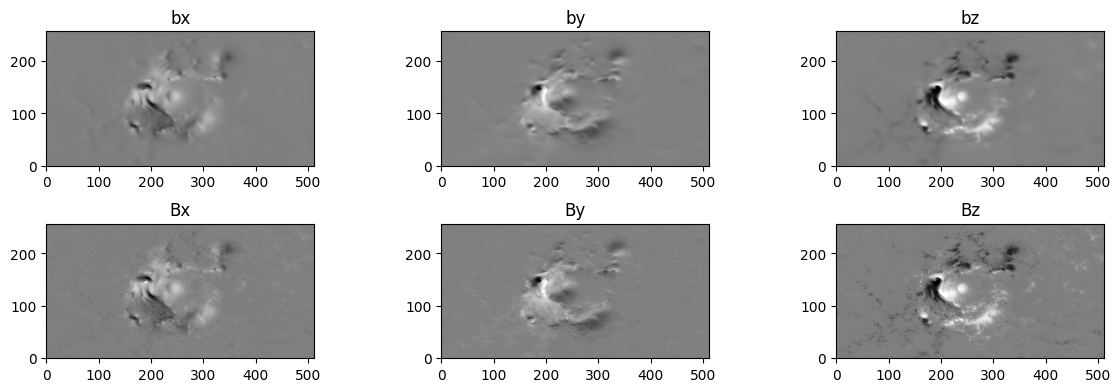

In [2]:
isee_noaa_12673 = evaluator("/userhome/jeon_mg/workspace/project/NF2/config/isee_noaa_12673.json")

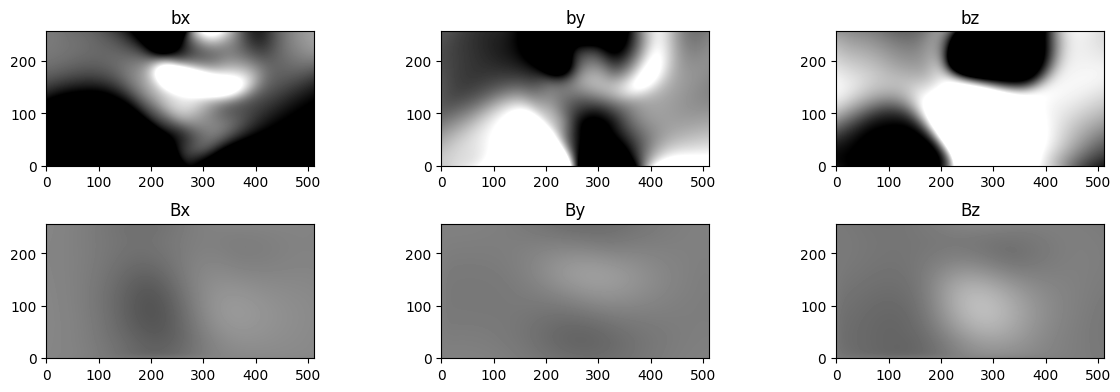

In [3]:
isee_noaa_12673.plot_slice(z=100, b_norm=100)

100%|██████████| 33884/33884 [00:41<00:00, 808.07it/s]


{'c_vec': 0.8930818992758658, 'c_cs': 0.5924872723075466, "E_n'": 0.0763254374515343, "E_m'": -1.7512459569918595, 'eps': 1.1637350104359865}


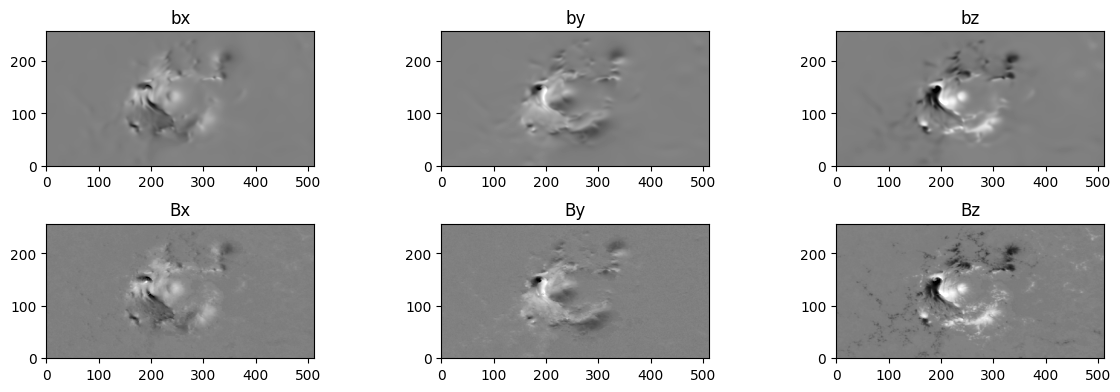

In [4]:
isee_noaa_12673_pf = evaluator("/userhome/jeon_mg/workspace/project/NF2/config/isee_noaa_12673_pf.json")

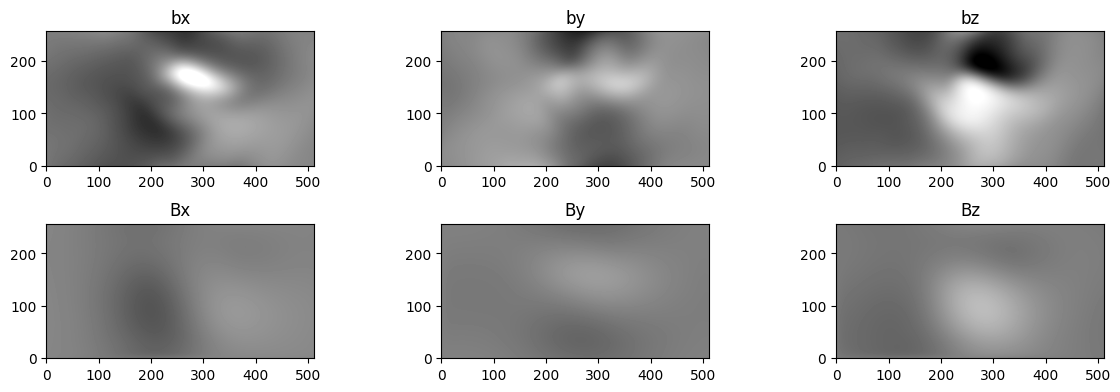

In [5]:
isee_noaa_12673_pf.plot_slice(z=100, b_norm=100)